In [1]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, kendalltau


from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau


def PCC(predictions, targets):
    return pearsonr(predictions, targets)[0]


def SROCC(predictions, targets):
    return spearmanr(predictions, targets)[0]


def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [2]:
df_train = pd.concat([pd.read_csv("features/reference_APSIPA.csv"), 
                      pd.read_csv("../3_raw_distances_TEXTURE/distances/MRLBP_ri/reference_APSIPA.csv")], axis=1)


df_validate = pd.concat([pd.read_csv("features/UnB.csv"), 
                      pd.read_csv("../3_raw_distances_TEXTURE/distances/MRLBP_ri/UnB.csv")], axis=1)

discard_columns = ['d_pl2plMAX', 'd_mmd', 'd_mmd_PSNR', 'd_msmd', 'd_msmd_PSNR']



replacements = {
    'd_mseF' : '$d_1^g$', 
    'd_mseF_PSNR' : '$d_2^g$', 
    'd_pl2plMIN' : '$d_3^g$', 
    'd_pl2plMEAN' : '$d_4^g$', 
    'd_pl2plMEDIAN' : '$d_5^g$', 
    'd_pl2plRMS' : '$d_6^g$', 
    'd_pl2plMSE' : '$d_7^g$', 
    'd_braycurtis' : '$d_1^t$', 
    'd_canberra' : '$d_2^t$', 
    'd_chebyshev' : '$d_3^t$', 
    'd_cityblock' : '$d_4^t$', 
    'd_cosine' : '$d_5^t$', 
    'd_euclidean' : '$d_6^t$', 
    'd_jensenshannon' : '$d_7^t$', 
    'd_wasserstein_distance' : '$d_8^t$', 
    'd_energy_distance' : '$d_9^t$'
}



df_train = df_train.loc[:,~df_train.columns.duplicated()]
df_validate = df_validate.loc[:,~df_validate.columns.duplicated()]


df_train = df_train.drop(columns=discard_columns)
df_validate = df_validate.drop(columns=discard_columns)

df_train = df_train.rename(columns=replacements)
df_validate = df_validate.rename(columns=replacements)

In [3]:
from IPython.display import Markdown, display

display(df_train.corr())
display(df_validate.corr())




SCORE   $d_1^g$   $d_2^g$   $d_3^g$   $d_4^g$   $d_5^g$   $d_6^g$  \
SCORE    1.000000 -0.484103  0.428627  0.152862  0.525382  0.673176  0.605489   
$d_1^g$ -0.484103  1.000000 -0.147504 -0.050458 -0.317655 -0.358785 -0.344353   
$d_2^g$  0.428627 -0.147504  1.000000  0.342624  0.465036  0.582581  0.522738   
$d_3^g$  0.152862 -0.050458  0.342624  1.000000  0.262069  0.259244  0.282786   
$d_4^g$  0.525382 -0.317655  0.465036  0.262069  1.000000  0.928873  0.981826   
$d_5^g$  0.673176 -0.358785  0.582581  0.259244  0.928873  1.000000  0.966058   
$d_6^g$  0.605489 -0.344353  0.522738  0.282786  0.981826  0.966058  1.000000   
$d_7^g$  0.615475 -0.340065  0.547778  0.309538  0.976405  0.968893  0.998033   
$d_1^t$ -0.746801  0.628803 -0.239186 -0.101918 -0.303844 -0.405372 -0.364875   
$d_2^t$ -0.770269  0.717017 -0.253030 -0.100111 -0.364532 -0.456748 -0.417607   
$d_3^t$ -0.626550  0.492358 -0.205428 -0.087594 -0.199399 -0.304200 -0.258283   
$d_4^t$ -0.746801  0.628803 -0.239186 -0.101918 -0.303844 -0.405372 -0.364875   
$d_5^t$ -0.653858  0.706889 -0.194735 -0.072046 -0.224939 -0.312379 -0.284101   
$d_6^t$ -0.666873  0.546491 -0.205764 -0.089153 -0.245741 -0.343801 -0.302714   
$d_7^t$ -0.761577  0.673208 -0.246677 -0.104648 -0.316876 -0.418384 -0.376794   
$d_8^t$ -0.633429  0.479879 -0.191901 -0.085525 -0.219353 -0.318162 -0.277778   
$d_9^t$ -0.720954  0.648554 -0.225645 -0.092738 -0.333973 -0.419784 -0.388421   

          $d_7^g$   $d_1^t$   $d_2^t$   $d_3^t$   $d_4^t$   $d_5^t$   $d_6^t$  \
SCORE    0.615475 -0.746801 -0.770269 -0.626550 -0.746801 -0.653858 -0.666873   
$d_1^g$ -0.340065  0.628803  0.717017  0.492358  0.628803  0.706889  0.546491   
$d_2^g$  0.547778 -0.239186 -0.253030 -0.205428 -0.239186 -0.194735 -0.205764   
$d_3^g$  0.309538 -0.101918 -0.100111 -0.087594 -0.101918 -0.072046 -0.089153   
$d_4^g$  0.976405 -0.303844 -0.364532 -0.199399 -0.303844 -0.224939 -0.245741   
$d_5^g$  0.968893 -0.405372 -0.456748 -0.304200 -0.405372 -0.312379 -0.343801   
$d_6^g$  0.998033 -0.364875 -0.417607 -0.258283 -0.364875 -0.284101 -0.302714   
$d_7^g$  1.000000 -0.369912 -0.420642 -0.265855 -0.369912 -0.288165 -0.308539   
$d_1^t$ -0.369912  1.000000  0.959691  0.932777  1.000000  0.933143  0.975065   
$d_2^t$ -0.420642  0.959691  1.000000  0.826335  0.959691  0.897947  0.890482   
$d_3^t$ -0.265855  0.932777  0.826335  1.000000  0.932777  0.868277  0.976896   
$d_4^t$ -0.369912  1.000000  0.959691  0.932777  1.000000  0.933143  0.975065   
$d_5^t$ -0.288165  0.933143  0.897947  0.868277  0.933143  1.000000  0.889177   
$d_6^t$ -0.308539  0.975065  0.890482  0.976896  0.975065  0.889177  1.000000   
$d_7^t$ -0.381762  0.995553  0.972041  0.916237  0.995553  0.945784  0.957846   
$d_8^t$ -0.283810  0.947658  0.848989  0.957094  0.947658  0.828239  0.987574   
$d_9^t$ -0.390331  0.971791  0.977111  0.858483  0.971791  0.881943  0.926449   

          $d_7^t$   $d_8^t$   $d_9^t$  
SCORE   -0.761577 -0.633429 -0.720954  
$d_1^g$  0.673208  0.479879  0.648554  
$d_2^g$ -0.246677 -0.191901 -0.225645  
$d_3^g$ -0.104648 -0.085525 -0.092738  
$d_4^g$ -0.316876 -0.219353 -0.333973  
$d_5^g$ -0.418384 -0.318162 -0.419784  
$d_6^g$ -0.376794 -0.277778 -0.388421  
$d_7^g$ -0.381762 -0.283810 -0.390331  
$d_1^t$  0.995553  0.947658  0.971791  
$d_2^t$  0.972041  0.848989  0.977111  
$d_3^t$  0.916237  0.957094  0.858483  
$d_4^t$  0.995553  0.947658  0.971791  
$d_5^t$  0.945784  0.828239  0.881943  
$d_6^t$  0.957846  0.987574  0.926449  
$d_7^t$  1.000000  0.920584  0.968280  
$d_8^t$  0.920584  1.000000  0.906799  
$d_9^t$  0.968280  0.906799  1.000000

SCORE   $d_1^g$   $d_2^g$   $d_3^g$   $d_4^g$   $d_5^g$   $d_6^g$  \
SCORE    1.000000 -0.766874  0.577300  0.577058  0.788464  0.813376  0.810753   
$d_1^g$ -0.766874  1.000000 -0.331813 -0.331636 -0.694037 -0.733659 -0.714309   
$d_2^g$  0.577300 -0.331813  1.000000  1.000000  0.636032  0.524921  0.646592   
$d_3^g$  0.577058 -0.331636  1.000000  1.000000  0.635898  0.524685  0.646432   
$d_4^g$  0.788464 -0.694037  0.636032  0.635898  1.000000  0.944085  0.994106   
$d_5^g$  0.813376 -0.733659  0.524921  0.524685  0.944085  1.000000  0.960582   
$d_6^g$  0.810753 -0.714309  0.646592  0.646432  0.994106  0.960582  1.000000   
$d_7^g$  0.807910 -0.694162  0.671793  0.671634  0.990085  0.953739  0.998444   
$d_1^t$ -0.781274  0.607268 -0.459956 -0.459791 -0.623963 -0.609263 -0.614492   
$d_2^t$ -0.835212  0.871429 -0.460641 -0.460383 -0.727954 -0.745715 -0.732912   
$d_3^t$ -0.584076  0.319338 -0.366264 -0.366252 -0.501685 -0.455803 -0.471184   
$d_4^t$ -0.781274  0.607268 -0.459956 -0.459791 -0.623963 -0.609263 -0.614492   
$d_5^t$ -0.729999  0.719978 -0.358123 -0.358042 -0.617941 -0.617435 -0.604343   
$d_6^t$ -0.646567  0.390290 -0.383729 -0.383637 -0.492132 -0.464926 -0.473650   
$d_7^t$ -0.841739  0.720389 -0.480745 -0.480551 -0.675699 -0.683091 -0.673960   
$d_8^t$ -0.477530  0.151132 -0.311616 -0.311512 -0.281649 -0.251674 -0.264101   
$d_9^t$ -0.539383  0.315423 -0.438652 -0.438497 -0.318451 -0.316581 -0.323560   

          $d_7^g$   $d_1^t$   $d_2^t$   $d_3^t$   $d_4^t$   $d_5^t$   $d_6^t$  \
SCORE    0.807910 -0.781274 -0.835212 -0.584076 -0.781274 -0.729999 -0.646567   
$d_1^g$ -0.694162  0.607268  0.871429  0.319338  0.607268  0.719978  0.390290   
$d_2^g$  0.671793 -0.459956 -0.460641 -0.366264 -0.459956 -0.358123 -0.383729   
$d_3^g$  0.671634 -0.459791 -0.460383 -0.366252 -0.459791 -0.358042 -0.383637   
$d_4^g$  0.990085 -0.623963 -0.727954 -0.501685 -0.623963 -0.617941 -0.492132   
$d_5^g$  0.953739 -0.609263 -0.745715 -0.455803 -0.609263 -0.617435 -0.464926   
$d_6^g$  0.998444 -0.614492 -0.732912 -0.471184 -0.614492 -0.604343 -0.473650   
$d_7^g$  1.000000 -0.604912 -0.716331 -0.463190 -0.604912 -0.582035 -0.469290   
$d_1^t$ -0.604912  1.000000  0.866902  0.895538  1.000000  0.921387  0.947529   
$d_2^t$ -0.716331  0.866902  1.000000  0.607070  0.866902  0.876401  0.686535   
$d_3^t$ -0.463190  0.895538  0.607070  1.000000  0.895538  0.794673  0.966292   
$d_4^t$ -0.604912  1.000000  0.866902  0.895538  1.000000  0.921387  0.947529   
$d_5^t$ -0.582035  0.921387  0.876401  0.794673  0.921387  1.000000  0.809646   
$d_6^t$ -0.469290  0.947529  0.686535  0.966292  0.947529  0.809646  1.000000   
$d_7^t$ -0.663604  0.979521  0.929204  0.825417  0.979521  0.928860  0.890899   
$d_8^t$ -0.267250  0.835961  0.493604  0.908249  0.835961  0.642672  0.949190   
$d_9^t$ -0.331115  0.850851  0.651425  0.767930  0.850851  0.696047  0.862307   

          $d_7^t$   $d_8^t$   $d_9^t$  
SCORE   -0.841739 -0.477530 -0.539383  
$d_1^g$  0.720389  0.151132  0.315423  
$d_2^g$ -0.480745 -0.311616 -0.438652  
$d_3^g$ -0.480551 -0.311512 -0.438497  
$d_4^g$ -0.675699 -0.281649 -0.318451  
$d_5^g$ -0.683091 -0.251674 -0.316581  
$d_6^g$ -0.673960 -0.264101 -0.323560  
$d_7^g$ -0.663604 -0.267250 -0.331115  
$d_1^t$  0.979521  0.835961  0.850851  
$d_2^t$  0.929204  0.493604  0.651425  
$d_3^t$  0.825417  0.908249  0.767930  
$d_4^t$  0.979521  0.835961  0.850851  
$d_5^t$  0.928860  0.642672  0.696047  
$d_6^t$  0.890899  0.949190  0.862307  
$d_7^t$  1.000000  0.747823  0.819013  
$d_8^t$  0.747823  1.000000  0.876434  
$d_9^t$  0.819013  0.876434  1.000000

In [17]:
# Create correlation tables using only distances (no regression)

dt = sorted([col for col in df_validate if col.startswith('$d_') and col.endswith('t$')])
dg = sorted([col for col in df_validate if col.startswith('$d_') and col.endswith('g$')])
distances = dt + dg

for name, df in [('train', df_train), ('validate', df_validate)]:
    out = []
    for metric, corr in [('SROCC', SROCC), ('PCC', PCC), ('RMSE', RMSE)]:
        line = {
            'CORR' : metric
        }
        for d in distances:
            line[d] = corr(df.SCORE.values, df[d].values)
        out.append(line)
    df_out = pd.DataFrame.from_dict(out)
    display(name)
    display(df_out)
    display(Markdown('---'))
    print(df_out.to_csv(index=False))

        

'train'

CORR   $d_1^t$     $d_2^t$   $d_3^t$   $d_4^t$   $d_5^t$   $d_6^t$  \
0  SROCC -0.877768   -0.901944 -0.751326 -0.877768 -0.853127 -0.829216   
1    PCC -0.746801   -0.770269 -0.626550 -0.746801 -0.653858 -0.666873   
2   RMSE  2.823465  438.111980  2.831423  4.382560  2.881917  2.736174   

    $d_7^t$   $d_8^t$   $d_9^t$   $d_1^g$       $d_2^g$   $d_3^g$   $d_4^g$  \
0 -0.884402 -0.811147 -0.854429 -0.867665      0.568108  0.144657  0.513489   
1 -0.761577 -0.633429 -0.720954 -0.484103      0.428627  0.152862  0.525382   
2  2.833297  2.907047  2.903831  4.786074  17209.112446  2.907861  2.274807   

    $d_5^g$   $d_6^g$   $d_7^g$  
0  0.598013  0.585750  0.585750  
1  0.673176  0.605489  0.615475  
2  2.243594  2.243709  2.379291

---

CORR,$d_1^t$,$d_2^t$,$d_3^t$,$d_4^t$,$d_5^t$,$d_6^t$,$d_7^t$,$d_8^t$,$d_9^t$,$d_1^g$,$d_2^g$,$d_3^g$,$d_4^g$,$d_5^g$,$d_6^g$,$d_7^g$
SROCC,-0.8777677445992539,-0.9019440190301854,-0.7513261083972327,-0.8777677445992539,-0.8531271525146615,-0.8292155150884071,-0.8844024348856072,-0.8111470627254262,-0.8544286854194831,-0.867665440392298,0.568108292001907,0.14465664088420005,0.5134885345203077,0.5980126704729017,0.5857501712692749,0.5857501712692749
PCC,-0.7468011635923442,-0.7702689868197141,-0.6265498229208261,-0.7468011635923442,-0.6538578802137269,-0.6668729547194322,-0.7615774122271042,-0.6334294157294404,-0.7209536122870517,-0.4841029343770216,0.42862708737842564,0.1528617424617569,0.5253816423718021,0.6731756738730588,0.6054891219636545,0.6154752954119819
RMSE,2.8234651608877273,438.11197975395896,2.8314229942032174,4.38256019446089,2.8819171143891715,2.7361735135416607,2.833297421253891,2.9070474486291498,2.9038309067382237,4.78607408921495,17209.112446470954,2.90786129616263,2.2

'validate'

CORR   $d_1^t$     $d_2^t$   $d_3^t$   $d_4^t$   $d_5^t$   $d_6^t$  \
0  SROCC -0.836442   -0.826852 -0.678026 -0.836442 -0.813231 -0.750104   
1    PCC -0.781274   -0.835212 -0.584076 -0.781274 -0.729999 -0.646567   
2   RMSE  2.916300  349.617713  2.942104  2.667380  2.979931  2.828087   

    $d_7^t$   $d_8^t$   $d_9^t$   $d_1^g$       $d_2^g$   $d_3^g$   $d_4^g$  \
0 -0.872189 -0.599166 -0.566199 -0.745334      0.702491  0.518300  0.759448   
1 -0.841739 -0.477530 -0.539383 -0.766874      0.577300  0.577058  0.788464   
2  2.922624  2.999055  2.996113  2.999700  20722.456392  2.850124  2.273205   

    $d_5^g$   $d_6^g$   $d_7^g$  
0  0.808888  0.782164  0.782164  
1  0.813376  0.810753  0.807910  
2  2.242318  2.249366  2.351954

---

CORR,$d_1^t$,$d_2^t$,$d_3^t$,$d_4^t$,$d_5^t$,$d_6^t$,$d_7^t$,$d_8^t$,$d_9^t$,$d_1^g$,$d_2^g$,$d_3^g$,$d_4^g$,$d_5^g$,$d_6^g$,$d_7^g$
SROCC,-0.8364420463015418,-0.82685205241719,-0.6780264661655382,-0.8364420463015418,-0.813231481393038,-0.7501043042586523,-0.8721890959690101,-0.5991661396440707,-0.5661987983488787,-0.7453340026887035,0.7024905556183573,0.5182995157272782,0.7594481207294219,0.808887898144736,0.7821643343807556,0.7821643343807556
PCC,-0.7812739522654337,-0.83521244779894,-0.5840756207396801,-0.7812739522654336,-0.7299990293249876,-0.6465671107272557,-0.8417389935336602,-0.4775303216063363,-0.5393831755555121,-0.766873681709646,0.577300099369309,0.5770580620216723,0.7884644178620208,0.8133756634498622,0.8107528443276376,0.8079103914556682
RMSE,2.916300032213368,349.6177125969109,2.942104275356682,2.6673796392970095,2.9799309047255353,2.828086775660158,2.9226240249264466,2.999054816323401,2.996113336633101,2.9997004568321484,20722.456392180462,2.8501242662967052,2.27320521

{'PCC': 0.9106275206835703,
 'SROCC': 0.8953952845327531,
 'RMSE': 0.5637925326365816,
 'max_error': 1.3015624999999993,
 'explained_variance_score': 0.8242583021319175,
 'mean_absolute_error': 0.4829947916666667,
 'r2_score': 0.792471134067857}

---

Feature ranking:
1. feature 13 [$d_7^t$] (0.181762)
2. feature 8 [$d_2^t$] (0.165477)
3. feature 0 [$d_1^g$] (0.119783)
4. feature 10 [$d_4^t$] (0.098465)
5. feature 7 [$d_1^t$] (0.088391)
6. feature 15 [$d_9^t$] (0.062250)
7. feature 6 [$d_7^g$] (0.054391)
8. feature 5 [$d_6^g$] (0.053981)
9. feature 4 [$d_5^g$] (0.049989)
10. feature 11 [$d_5^t$] (0.042838)
11. feature 1 [$d_2^g$] (0.026154)
12. feature 3 [$d_4^g$] (0.022490)
13. feature 9 [$d_3^t$] (0.013246)
14. feature 14 [$d_8^t$] (0.011121)
15. feature 12 [$d_6^t$] (0.009662)
16. feature 2 [$d_3^g$] (0.000000)


['$d_7^t$',
 '$d_2^t$',
 '$d_1^g$',
 '$d_4^t$',
 '$d_1^t$',
 '$d_9^t$',
 '$d_7^g$',
 '$d_6^g$',
 '$d_5^g$',
 '$d_5^t$',
 '$d_2^g$',
 '$d_4^g$',
 '$d_3^t$',
 '$d_8^t$',
 '$d_6^t$',
 '$d_3^g$']

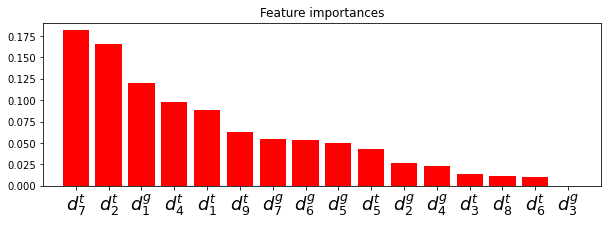

In [8]:
# ALL DISTANCES as MODEL all distances
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


np.random.seed(123)


def RFR(X_train, y_train):
    regressor = RandomForestRegressor(
        n_estimators=X_train.shape[1],
        min_samples_split=2,
        max_features='sqrt'
    )
    regressor.fit(X_train, y_train)
    return regressor


d = [col for col in df_validate if col.startswith('$d_')]

X_test, y_true = df_validate[d].values, df_validate.SCORE.values
X_train, y_train = df_train[d].values, df_train.SCORE.values

rfr = RFR(X_train, y_train)
y_pred = rfr.predict(X_test)


display({
    'PCC' : PCC(y_true, y_pred),
    'SROCC' : SROCC(y_true, y_pred),
    'RMSE' : RMSE(y_true, y_pred),
    'max_error' : max_error(y_true, y_pred),
    'explained_variance_score' : explained_variance_score(y_true, y_pred),
    'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
    'r2_score' : r2_score(y_true, y_pred),
})

display(Markdown('---'))


importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0) / 2.0
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

sorted_by_importance = []

for f in range(X_test.shape[1]):
    print("%d. feature %d [%s] (%f)" % (f + 1, indices[f], d[indices[f]], importances[indices[f]]))
    sorted_by_importance.append(d[indices[f]])

display(sorted_by_importance)

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(10, 3))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
        color="r", yerr=None, align="center")
#plt.xticks(range(X_test.shape[1]), indices)
plt.xticks(range(X_test.shape[1]), [d[indices[f]].replace("distance", "").title().lower() for f in range(X_test.shape[1])])
plt.xlim([-1, X_test.shape[1]])
plt.xticks(fontsize=18)
plt.savefig('feature_importances.pdf',dpi=300, bbox_inches='tight')
plt.show()



In [7]:
# ALL DISTANCES as MODEL
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeRegressor
from tpot.builtins import StackingEstimator

np.random.seed(123)

def TPOT(X_train, y_train):
    regressor = make_pipeline(
        StackingEstimator(
            estimator=GradientBoostingRegressor(alpha=0.85, learning_rate=0.001, loss="quantile", max_depth=9, 
                                                max_features=0.8, min_samples_leaf=9, min_samples_split=6, 
                                                n_estimators=100, subsample=0.8)),
        StackingEstimator(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=9)),
        SelectFwe(score_func=f_regression, alpha=0.036000000000000004),
        AdaBoostRegressor(learning_rate=0.1, loss="exponential", n_estimators=100))
    regressor.fit(X_train, y_train)
    return regressor




d = sorted([col for col in df_validate if col.startswith('$d_')])
X_test, y_true = df_validate[d].values, df_validate.SCORE.values
X_train, y_train = df_train[d].values, df_train.SCORE.values

rfr = TPOT(X_train, y_train)
y_pred = rfr.predict(X_test)

display({
    'PCC' : PCC(y_true, y_pred),
    'SROCC' : SROCC(y_true, y_pred),
    'RMSE' : RMSE(y_true, y_pred),
    'max_error' : max_error(y_true, y_pred),
    'explained_variance_score' : explained_variance_score(y_true, y_pred),
    'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
    'r2_score' : r2_score(y_true, y_pred),
})

display(Markdown('---'))





{'PCC': 0.85523024291506,
 'SROCC': 0.8672380115823817,
 'RMSE': 0.8526138172919041,
 'max_error': 2.452777777777778,
 'explained_variance_score': 0.7254923873684994,
 'mean_absolute_error': 0.7158135672508137,
 'r2_score': 0.5253815606380983}

---

$R_1$
	>$R_1$ SROCC=0.880 (STD=0.060)
	>$R_1$ PCC=0.877 (STD=0.057)
	>$R_1$ RMSE=-0.650 (STD=0.105)
$R_2$
	>$R_2$ SROCC=0.904 (STD=0.059)
	>$R_2$ PCC=0.906 (STD=0.061)
	>$R_2$ RMSE=-0.565 (STD=0.116)
$R_3$
	>$R_3$ SROCC=0.820 (STD=0.085)
	>$R_3$ PCC=0.485 (STD=0.102)
	>$R_3$ RMSE=-1.250 (STD=0.182)
$R_4$
	>$R_4$ SROCC=0.893 (STD=0.054)
	>$R_4$ PCC=0.581 (STD=0.130)
	>$R_4$ RMSE=-1.200 (STD=0.183)
$R_5$
	>$R_5$ SROCC=0.941 (STD=0.030)
	>$R_5$ PCC=0.940 (STD=0.034)
	>$R_5$ RMSE=-0.458 (STD=0.087)
$R_6$
	>$R_6$ SROCC=0.941 (STD=0.032)
	>$R_6$ PCC=0.940 (STD=0.031)
	>$R_6$ RMSE=-0.455 (STD=0.074)
$R_7$
	>$R_7$ SROCC=0.936 (STD=0.033)
	>$R_7$ PCC=0.940 (STD=0.033)
	>$R_7$ RMSE=-0.452 (STD=0.097)
$R_8$
	>$R_8$ SROCC=0.903 (STD=0.055)
	>$R_8$ PCC=0.879 (STD=0.060)
	>$R_8$ RMSE=-0.636 (STD=0.096)
$R_9$
	>$R_9$ SROCC=0.893 (STD=0.054)
	>$R_9$ PCC=0.812 (STD=0.058)
	>$R_9$ RMSE=-0.807 (STD=0.098)
$R_{10}$
	>$R_{10}$ SROCC=0.936 (STD=0.034)
	>$R_{10}$ PCC=0.934 (STD=0.038)
	>$R_{10}$ RMSE=-0.471 

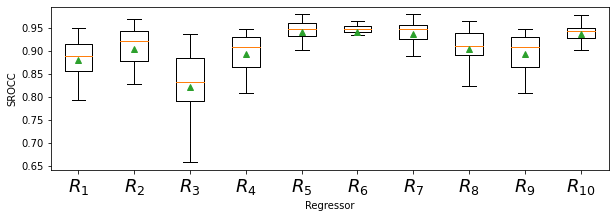

---

$R_1$
	>$R_1$ SROCC=0.768 (STD=0.160)
	>$R_1$ PCC=0.831 (STD=0.106)
	>$R_1$ RMSE=-0.668 (STD=0.181)
$R_2$
	>$R_2$ SROCC=0.732 (STD=0.255)
	>$R_2$ PCC=0.788 (STD=0.236)
	>$R_2$ RMSE=-0.671 (STD=0.216)
$R_3$
	>$R_3$ SROCC=0.728 (STD=0.203)
	>$R_3$ PCC=0.720 (STD=0.124)
	>$R_3$ RMSE=-1.040 (STD=0.273)
$R_4$
	>$R_4$ SROCC=0.781 (STD=0.181)
	>$R_4$ PCC=0.750 (STD=0.134)
	>$R_4$ RMSE=-1.033 (STD=0.261)
$R_5$
	>$R_5$ SROCC=0.830 (STD=0.143)
	>$R_5$ PCC=0.890 (STD=0.112)
	>$R_5$ RMSE=-0.530 (STD=0.174)
$R_6$
	>$R_6$ SROCC=0.838 (STD=0.128)
	>$R_6$ PCC=0.891 (STD=0.089)
	>$R_6$ RMSE=-0.539 (STD=0.201)
$R_7$
	>$R_7$ SROCC=0.818 (STD=0.160)
	>$R_7$ PCC=0.863 (STD=0.156)
	>$R_7$ RMSE=-0.567 (STD=0.201)
$R_8$
	>$R_8$ SROCC=0.826 (STD=0.176)
	>$R_8$ PCC=0.881 (STD=0.102)
	>$R_8$ RMSE=-0.567 (STD=0.120)
$R_9$
	>$R_9$ SROCC=0.781 (STD=0.181)
	>$R_9$ PCC=0.850 (STD=0.129)
	>$R_9$ RMSE=-0.621 (STD=0.186)
$R_{10}$
	>$R_{10}$ SROCC=0.811 (STD=0.170)
	>$R_{10}$ PCC=0.870 (STD=0.101)
	>$R_{10}$ RMSE=-0.595 

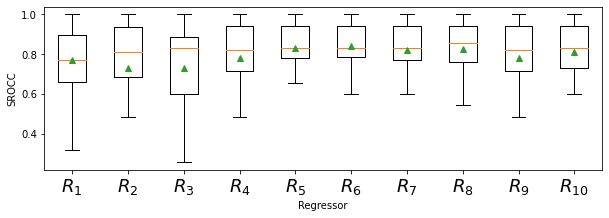

---

In [52]:
## K-fold CV

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV


np.random.seed(123)

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('extratrees', ExtraTreesRegressor()))
    level0.append(('gbr', GradientBoostingRegressor()))
    level0.append(('svr', SVR(kernel='rbf')))
    level0.append(('ridgecv', RidgeCV()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['$R_1$'] = KNeighborsRegressor()
    models['$R_2$'] = DecisionTreeRegressor()
    models['$R_3$'] =  SVR(kernel='poly')
    models['$R_4$'] =  SVR(kernel='rbf')
    models['$R_5$'] = RandomForestRegressor()
    models['$R_6$'] = ExtraTreesRegressor()
    models['$R_7$'] = GradientBoostingRegressor()
    models['$R_8$'] = RidgeCV()
    models['$R_9$'] = Lasso(random_state=1)
    models['$R_{10}$'] = get_stacking()
    return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y, scorer, greater_is_better=True):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scorer = make_scorer(scorer, greater_is_better=greater_is_better)
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores


def run_evaluations(plot_name, X, y):
    models = get_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        print(name)
        scores_srocc = evaluate_model(model, X, y, SROCC, True)
        scores_pcc = evaluate_model(model, X, y, PCC, True)
        scores_rmse = evaluate_model(model, X, y, RMSE, False)
        results.append(scores_srocc)
        names.append(name)
        print('\t>%s SROCC=%.3f (STD=%.3f)' % (name, mean(scores_srocc), std(scores_srocc)))
        print('\t>%s PCC=%.3f (STD=%.3f)' % (name, mean(scores_pcc), std(scores_pcc)))
        print('\t>%s RMSE=%.3f (STD=%.3f)' % (name, mean(scores_rmse), std(scores_rmse)))
    # plot model performance for comparison
    plt.figure(figsize=(10, 3))
    pyplot.boxplot(results, labels=names, showmeans=True, showfliers=False)
    pyplot.xticks(fontsize=18)
    pyplot.xlabel("Regressor")
    pyplot.ylabel("SROCC")
    plt.savefig(plot_name,dpi=300, bbox_inches='tight')
    pyplot.show()
    display(Markdown('---'))

d = sorted([col for col in df_validate if col.startswith('$d_')])
X_test, y_true = df_validate[d].values, df_validate.SCORE.values
X_train, y_train = df_train[d].values, df_train.SCORE.values

# X_train
run_evaluations("boxplot_train.pdf", X_train, y_train)
run_evaluations("boxplot_test.pdf", X_test, y_true)


1
	>1 SROCC=0.865 (STD=0.052)
	>1 PCC=0.850 (STD=0.061)
	>1 RMSE=-0.713 (STD=0.091)
2
	>2 SROCC=0.875 (STD=0.059)
	>2 PCC=0.863 (STD=0.058)
	>2 RMSE=-0.691 (STD=0.095)
3
	>3 SROCC=0.898 (STD=0.060)
	>3 PCC=0.886 (STD=0.055)
	>3 RMSE=-0.616 (STD=0.107)
4
	>4 SROCC=0.898 (STD=0.047)
	>4 PCC=0.886 (STD=0.053)
	>4 RMSE=-0.618 (STD=0.108)
5
	>5 SROCC=0.894 (STD=0.047)
	>5 PCC=0.884 (STD=0.053)
	>5 RMSE=-0.619 (STD=0.103)
6
	>6 SROCC=0.895 (STD=0.046)
	>6 PCC=0.886 (STD=0.052)
	>6 RMSE=-0.623 (STD=0.104)
7
	>7 SROCC=0.924 (STD=0.038)
	>7 PCC=0.921 (STD=0.041)
	>7 RMSE=-0.523 (STD=0.080)
8
	>8 SROCC=0.930 (STD=0.032)
	>8 PCC=0.926 (STD=0.035)
	>8 RMSE=-0.509 (STD=0.074)
9
	>9 SROCC=0.931 (STD=0.032)
	>9 PCC=0.934 (STD=0.030)
	>9 RMSE=-0.481 (STD=0.074)
10
	>10 SROCC=0.932 (STD=0.033)
	>10 PCC=0.932 (STD=0.034)
	>10 RMSE=-0.494 (STD=0.079)
11
	>11 SROCC=0.931 (STD=0.043)
	>11 PCC=0.936 (STD=0.034)
	>11 RMSE=-0.474 (STD=0.092)
12
	>12 SROCC=0.934 (STD=0.039)
	>12 PCC=0.937 (STD=0.037)
	>12 RMSE

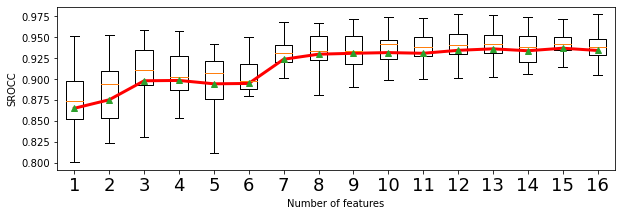

---

In [53]:
## K-fold CV

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV


np.random.seed(123)

def get_stacking2():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('extratrees', ExtraTreesRegressor()))
    level0.append(('gbr', GradientBoostingRegressor()))
    level0.append(('svr', SVR(kernel='rbf')))
    level0.append(('ridgecv', RidgeCV()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model



def run_evaluations2(plot_name, df):
    models = get_models()
    # evaluate the models and store results
    results, names, sroccs = list(), list(), list()
    model = get_stacking2()
    for i in range(len(sorted_by_importance)):
        name = i + 1
        print(name)
        d = sorted_by_importance[:i+1]
        X, y = df[d].values, df.SCORE.values
        scores_srocc = evaluate_model(model, X, y, SROCC, True)
        scores_pcc = evaluate_model(model, X, y, PCC, True)
        scores_rmse = evaluate_model(model, X, y, RMSE, False)
        results.append(scores_srocc)
        names.append(name)
        sroccs.append(mean(scores_srocc))
        print('\t>%s SROCC=%.3f (STD=%.3f)' % (name, mean(scores_srocc), std(scores_srocc)))
        print('\t>%s PCC=%.3f (STD=%.3f)' % (name, mean(scores_pcc), std(scores_pcc)))
        print('\t>%s RMSE=%.3f (STD=%.3f)' % (name, mean(scores_rmse), std(scores_rmse)))
    # plot model performance for comparison
    plt.figure(figsize=(10, 3))
    pyplot.boxplot(results, labels=names, showmeans=True, showfliers=False)
    pyplot.plot(names, sroccs, linestyle='solid',  color='red', linewidth=3)
    pyplot.xticks(fontsize=18)
    pyplot.xlabel("Number of features")
    pyplot.ylabel("SROCC")
    plt.savefig(plot_name,dpi=300, bbox_inches='tight')
    pyplot.show()
    display(Markdown('---'))


# X_train
run_evaluations2("boxplot_train_different_distances.pdf", df_train)
#run_evaluations2("boxplot_test_different_distances.pdf", df_validate)

In [54]:
# CROSS-DB tests

models = get_models()
for name, model in models.items():
    d = sorted([col for col in df_validate if col.startswith('$d_')])
    X_test, y_true = df_validate[d].values, df_validate.SCORE.values
    X_train, y_train = df_train[d].values, df_train.SCORE.values

    rfr = model
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)

    display(name)
    display("train-test")
    display({
        'PCC' : PCC(y_true, y_pred),
        'SROCC' : SROCC(y_true, y_pred),
        'RMSE' : RMSE(y_true, y_pred),
        'max_error' : max_error(y_true, y_pred),
        'explained_variance_score' : explained_variance_score(y_true, y_pred),
        'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
        'r2_score' : r2_score(y_true, y_pred),
    })

    
    
    rfr = model
    rfr.fit(X_test, y_true)
    y_pred = rfr.predict(X_train)

    display("test-train")
    display({
        'PCC' : PCC(y_train, y_pred),
        'SROCC' : SROCC(y_train, y_pred),
        'RMSE' : RMSE(y_train, y_pred),
        'max_error' : max_error(y_train, y_pred),
        'explained_variance_score' : explained_variance_score(y_train, y_pred),
        'mean_absolute_error' : mean_absolute_error(y_train, y_pred),
        'r2_score' : r2_score(y_train, y_pred),
    })
    
    
    
    display(Markdown('---'))



'$R_1$'

'train-test'

{'PCC': 0.8332081190760448,
 'SROCC': 0.8101633665735145,
 'RMSE': 0.7508792068857235,
 'max_error': 2.7149999999999994,
 'explained_variance_score': 0.6845165328469305,
 'mean_absolute_error': 0.48525,
 'r2_score': 0.6318879532313285}

'test-train'

{'PCC': 0.8662675194525948,
 'SROCC': 0.8817504566884772,
 'RMSE': 0.7279467463470397,
 'max_error': 2.0700000000000003,
 'explained_variance_score': 0.7472233098848821,
 'mean_absolute_error': 0.5896551724137932,
 'r2_score': 0.7136470026890441}

---

'$R_2$'

'train-test'

{'PCC': 0.6458424127324915,
 'SROCC': 0.5898269784954158,
 'RMSE': 1.2141312051559061,
 'max_error': 2.475,
 'explained_variance_score': 0.40767809722526394,
 'mean_absolute_error': 0.9745833333333331,
 'r2_score': 0.0375656460276419}

'test-train'

{'PCC': 0.7744364224239588,
 'SROCC': 0.7820818068043159,
 'RMSE': 0.8655399948925646,
 'max_error': 3.1249999999999996,
 'explained_variance_score': 0.599509805090422,
 'mean_absolute_error': 0.6618534482758621,
 'r2_score': 0.5951661711799278}

---

'$R_3$'

'train-test'

{'PCC': 0.5770765595096418,
 'SROCC': 0.8048089650250421,
 'RMSE': 1.0625974739047803,
 'max_error': 2.499999938204431,
 'explained_variance_score': 0.32911844200799123,
 'mean_absolute_error': 0.8513656632529332,
 'r2_score': 0.2628134000957112}

'test-train'

{'PCC': 0.4283390615636159,
 'SROCC': 0.8628143103604191,
 'RMSE': 1.2396020546142736,
 'max_error': 2.675000011085834,
 'explained_variance_score': 0.18034122568697541,
 'mean_absolute_error': 1.0411312609308885,
 'r2_score': 0.16963872009940795}

---

'$R_4$'

'train-test'

{'PCC': 0.6119111942744606,
 'SROCC': 0.8292981957847928,
 'RMSE': 1.030204624458532,
 'max_error': 2.4308966314771423,
 'explained_variance_score': 0.3734244733185361,
 'mean_absolute_error': 0.8202129504792044,
 'r2_score': 0.30707398905762506}

'test-train'

{'PCC': 0.43664246488983127,
 'SROCC': 0.9074691585296557,
 'RMSE': 1.2338638465999174,
 'max_error': 2.6678637637371123,
 'explained_variance_score': 0.18834007624958293,
 'mean_absolute_error': 1.035844228011235,
 'r2_score': 0.17730853230026733}

---

'$R_5$'

'train-test'

{'PCC': 0.8946684187442845,
 'SROCC': 0.8916316447910028,
 'RMSE': 0.8035694062276141,
 'max_error': 1.689000000000001,
 'explained_variance_score': 0.764998853600347,
 'mean_absolute_error': 0.6896791666666665,
 'r2_score': 0.5784135329090455}

'test-train'

{'PCC': 0.8577718784546158,
 'SROCC': 0.8714663096895194,
 'RMSE': 0.7239117709743177,
 'max_error': 1.8170000000000017,
 'explained_variance_score': 0.7229582417639785,
 'mean_absolute_error': 0.6060862068965523,
 'r2_score': 0.7168126877000356}

---

'$R_6$'

'train-test'

{'PCC': 0.9063245059621512,
 'SROCC': 0.9023211347244807,
 'RMSE': 0.5626228199246813,
 'max_error': 1.4589999999999992,
 'explained_variance_score': 0.8212957833294566,
 'mean_absolute_error': 0.46955833333333363,
 'r2_score': 0.7933313701300201}

'test-train'

{'PCC': 0.8631886836307519,
 'SROCC': 0.9016821492304263,
 'RMSE': 0.781575647302868,
 'max_error': 2.6055000000000006,
 'explained_variance_score': 0.716648415030184,
 'mean_absolute_error': 0.6036400862068969,
 'r2_score': 0.6699007384574218}

---

'$R_7$'

'train-test'

{'PCC': 0.8638530027054467,
 'SROCC': 0.8625339321217442,
 'RMSE': 0.9573304633468817,
 'max_error': 2.0000807803991334,
 'explained_variance_score': 0.7308069101265363,
 'mean_absolute_error': 0.8055268265641096,
 'r2_score': 0.40163851436977993}

'test-train'

{'PCC': 0.8655279329141862,
 'SROCC': 0.8888389134656286,
 'RMSE': 0.6956166085737644,
 'max_error': 2.110672403707837,
 'explained_variance_score': 0.7385434126117278,
 'mean_absolute_error': 0.5608216878775548,
 'r2_score': 0.7385176374749849}

---

'$R_8$'

'train-test'

{'PCC': 0.9023764159341795,
 'SROCC': 0.8977068188265028,
 'RMSE': 0.5927157683391884,
 'max_error': 1.476268481503586,
 'explained_variance_score': 0.8122792910792282,
 'mean_absolute_error': 0.49394300192191376,
 'r2_score': 0.770631995437662}

'test-train'

{'PCC': 0.8422238692811695,
 'SROCC': 0.9194711684290536,
 'RMSE': 0.8200206026230235,
 'max_error': 2.5387239666843304,
 'explained_variance_score': 0.680294697782031,
 'mean_absolute_error': 0.6638261276746195,
 'r2_score': 0.6366275117874516}

---

'$R_9$'

'train-test'

{'PCC': 0.8492917131193485,
 'SROCC': 0.8296039637057431,
 'RMSE': 0.6824915721242513,
 'max_error': 1.8661008417060585,
 'explained_variance_score': 0.6960800044672082,
 'mean_absolute_error': 0.5469652024305994,
 'r2_score': 0.6958873682286102}

'test-train'

{'PCC': 0.7994347484482784,
 'SROCC': 0.9071183942089107,
 'RMSE': 0.927737260240105,
 'max_error': 3.0153015759081363,
 'explained_variance_score': 0.5352268504623104,
 'mean_absolute_error': 0.7316952865294973,
 'r2_score': 0.5348933881048654}

---

'$R_{10}$'

'train-test'

{'PCC': 0.8733540363563081,
 'SROCC': 0.8856706815745481,
 'RMSE': 0.7228452662982088,
 'max_error': 2.177118538253041,
 'explained_variance_score': 0.7446768790028548,
 'mean_absolute_error': 0.5420744461621948,
 'r2_score': 0.658861640515253}

'test-train'

{'PCC': 0.8846425098871769,
 'SROCC': 0.9064673871774047,
 'RMSE': 0.6649285743331089,
 'max_error': 1.998604363139163,
 'explained_variance_score': 0.7702137529844049,
 'mean_absolute_error': 0.5276254953148001,
 'r2_score': 0.7610799990059169}

---

In [ ]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=30, population_size=50, 
#                      verbosity=2, n_jobs=16, use_dask=True)
# tpot.fit(X_train, y_train)

# display(Markdown('---'))

# scores = evaluate_model(model, X_train, y_train)
# print('>%s %.3f (%.3f)' % ('tpot', mean(scores), std(scores)))

# display(Markdown('---'))

# print(tpot.export())


# y_pred = tpot.predict(X_test)

# display({
#     'PCC' : PCC(y_true, y_pred),
#     'SROCC' : SROCC(y_true, y_pred),
#     'RMSE' : RMSE(y_true, y_pred),
#     'max_error' : max_error(y_true, y_pred),
#     'explained_variance_score' : explained_variance_score(y_true, y_pred),
#     'mean_absolute_error' : mean_absolute_error(y_true, y_pred),
#     'r2_score' : r2_score(y_true, y_pred),
# })

# display(Markdown('---'))

In [ ]:
# Leave-one-out CV

d = sorted([col for col in df_validate if col.startswith('d_')])


def return_single_simulation(x_train, y_train, x_test, y_test, model):
    x_train = x_train
    x_test = x_test
    y_train = y_train
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    residual = y_test - y_pred
    return [x_test, y_test, y_pred, residual]



for name, df in [('train', df_train), ('validate', df_validate)]:
    simulations = len(df.index)
    output = []
    for i in tqdm(range(simulations)):
        row = df.iloc[[i]]
        reference_name = row.REF.tolist()[0]
        others = df[df.REF != reference_name]
        y_test_ = row.SCORE.values
        x_test_ = row[d].values
        x_train_ = others[d].values
        y_train_ = others.SCORE.values
        model = get_stacking()        
        [x_test_, y_test_, y_pred_, residual] = return_single_simulation(
            x_train_, y_train_, x_test_, y_test_, model)
        line = {
            'simulation': i,
            'IMG': row["IMG"].tolist()[0],
            'REF': row["REF"].tolist()[0],
            'MOS': y_test_[0],
            'MOSp': y_pred_[0]
        }
        output.append(line)
    df_out = pd.DataFrame.from_dict(output)
    display(name)
    display({
        'PCC' : PCC(df_out.MOS, df_out.MOSp),
        'SROCC' : SROCC(df_out.MOS, df_out.MOSp),
        'RMSE' : RMSE(df_out.MOS, df_out.MOSp),
        'max_error' : max_error(df_out.MOS, df_out.MOSp),
        'explained_variance_score' : explained_variance_score(df_out.MOS, df_out.MOSp),
        'mean_absolute_error' : mean_absolute_error(df_out.MOS, df_out.MOSp),
        'r2_score' : r2_score(df_out.MOS, df_out.MOSp),
    })




